## Lesson-02 Data Scientific Programming Intro

#### In this course you will learn
+ Wordcloud
+ GraphVisulization
+ Data Clean
+ Regular Expression
+ K-means

#### Wordcloud

In [1]:
!pip install wordcloud

Looking in indexes: https://pypi.douban.com/simple


#### 从第一课的练习开始

In [94]:
import jieba
import numpy as np
from jieba import posseg
from collections import defaultdict


def cut(string):
    return list(jieba.cut(string))


def idf(word):
    eps = 1e-6
    
    return 1 / (np.log10(sum(1 for s in sentences if word in s)) + eps)


def tf(word, sentence_cut):
    return sentence_cut.count(word)


def tfidf(word, sentence):
    return tf(word, sentence) * idf(word)


def get_tfidf_from_sentence(sentence_cut):
    ## you code here
    '''
    return : a dictionary
    '''
    
    tf_idf_words = dict()
    
    for c in set(sentence_cut):
        tf_idf_words[c] = tfidf(c, sentence_cut)
        
    return tf_idf_words


def get_top_tfidf(sentence_cut, ratio=0.25):
    """
    return : [(word1, tfidf_value), (word2, tfidf_value)]
    """
    tfidf_value = get_tfidf_from_sentence(sentence_cut)
    
    top_ratio = ratio
    
    return sorted(tfidf_value.items(), key=lambda x: x[1], reverse=True)[:int(len(tfidf_value)*top_ratio)]


def is_name(cut_word):
    w, _type = list(posseg.cut(cut_word))[0]
    
    if _type == 'nr': return True
    
    return False


# def get_names_from_sentence(sentence: str):
#     names = []
    
#     for w_t in posseg.cut(cut_word):
#         w, t = tuple(w_t)
        
#         if t ++ 
#     return [w for w in cut_sentence if is_name(w)]


# we do some refractor
def get_name_correlate(sentence: str):
    
    name_correlate = defaultdict(lambda : defaultdict(int))
    
    names = []
    
    for w_t in posseg.cut(sentence):
        w, t = tuple(w_t)
        
        if t == 'nr': names.append(w)
            
    for n in names:
        for w in names:
            if n == w: continue
                
            name_correlate[n][w] += 1 
    
    return name_correlate

In [3]:
content = open('dataset/article_9k.txt')
CHARACTERS = content.read()

In [4]:
sentences = CHARACTERS.split('\n')
all_sentences_with_cut_tokens = []

In [5]:
all_sentences_with_cut_tokens = [cut(s) for s in sentences]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/t4/cqwq7kjd23zb1pddhb8858rh0000gn/T/jieba.cache
Loading model cost 0.643 seconds.
Prefix dict has been built succesfully.


In [11]:
sample_news = get_top_tfidf(all_sentences_with_cut_tokens[99])

In [8]:
from wordcloud import WordCloud

In [9]:
wc = WordCloud(background_color="white", max_words=1000)

In [10]:
wc.generate_from_frequencies?

In [12]:
wc.generate_from_frequencies({w: v for w, v in sample_news})

In [15]:
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

In [14]:
wc.generate_from_frequencies({w: v for w, v in sample_news})

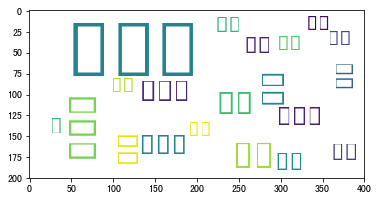

In [19]:
plt.imshow(wc)

In [32]:
wc = WordCloud(background_color="white", max_words=1000, font_path='fonts/SimHei.ttf')

In [33]:
wc.generate_from_frequencies({w: v for w, v in sample_news})

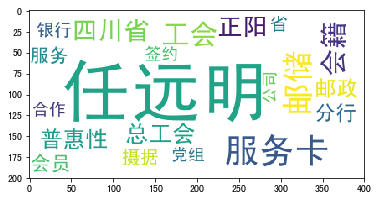

In [34]:
plt.imshow(wc)

In [44]:
def generate_word_cloud_by_article(string):
    wc = WordCloud(background_color="black", max_words=1000, font_path='fonts/SimHei.ttf')
    words_importances = get_top_tfidf(cut(string), ratio=1.)
    
    wc.generate_from_frequencies({w: v for w, v in words_importances})
    
    plt.imshow(wc)

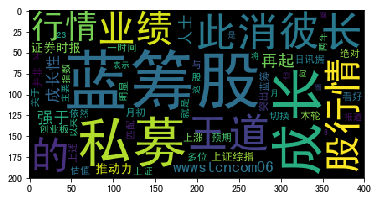

In [45]:
generate_word_cloud_by_article(sentences[10])

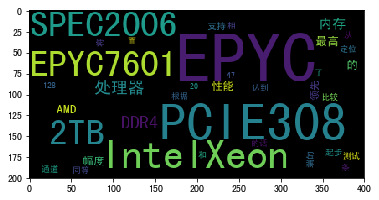

In [64]:
generate_word_cloud_by_article(sentences[50])

In [67]:
test_news = """
（原标题：中信电子评美国芯片限制升级：华为已有所准备 长期利好国内半导体板块发展）

美国限制升级，从华为供应端到海思芯片端。

2020年5月15日，美国商务部发布公告，计划限制华为使用美国技术和软件在美国境外设计和制造半导体的能力。具体来说，华为及其被列入实体名单中的分支机构，基于管制清单中的美国软件及技术生产的直接产品，与使用美国境外的管制清单中半导体设备所生产的基于华为设计规范的直接产品，在向华为及分支机构出货时，都需要申请许可证，相当于是对2019年5月17日将华为纳入实体名单的进一步升级。

但是同时也看到，本次公告只是计划而非正式条例出台，同时条例生效后上游供应商仍有120天的缓冲期。与此同时，美国商务部还宣布将华为的临时许可证再延长90天，推迟至2020年8月13日。美方2019年5月21日针对华为发放第一次临时许可证，截至本次已是第5次延长临时许可证，借助临时许可证，华为可从美国进口特定产品和技术。此外，据路透社报道，本次可能是最后一次延长许可证，同样属于对华为制裁的进一步升级。此外，此前华为的美国供应商也可通过证明产品无关国家安全，申请豁免继续供货，不受临时许可时效约束。

我们认为，过去一年华为在IC设计端已基本实现自研替代或非美供应商切换，而制造端华为仍高度依赖台积电，且上游半导体设备、EDA软件仍被美国厂商垄断，因而成为美方重点施压方向。目前华为已实现大量芯片自研，但制造环节仍然高度依赖台积电，是其产业链中的主要瓶颈。一旦制造环节无法在台积电下单，而中芯国际技术和产能爬坡仍需一定时间，则其大量自研的芯片将无法实现量产和应用，因此成为本次美国制裁政策的切入点。此外，在半导体设备方面，目前美国厂商占据半导体设备市场约40%份额，其中在沉积、刻蚀、离子注入、CMP、清洗、检测等关键工艺方面，应用材料、泛林、科天等美国厂商具有领先工艺技术优势和稳定性，经过了长期量产检验，因此短期内难以替代；在EDA软件方面，目前IC设计的EDA工具仍基本由Cadence、Synopsys、Mentor三家美国公司垄断，短期难以完全替代。
"""

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


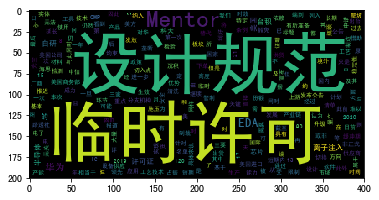

In [70]:
generate_word_cloud_by_article(test_news)

### For more information: https://github.com/amueller/word_cloud/tree/master/examples

## Topic2: Graph 

![](imgs/g_1.png)

![](imgs/g_2.jpg)

![](imgs/g_3.jpg)

In [65]:
!pip install networkx

Looking in indexes: https://pypi.douban.com/simple


In [66]:
import networkx as nx

In [86]:
sentences[1000]

'在上周五刚刚结束的挑战的法则中由潘玮柏大张伟戚薇乔杉刘维于小彤组成的首发嘉宾阵容在经过第一期户外挑战和比拼之后迎来了他们首次舞台表演潘玮柏首发登场霸气演绎分裂的时光超完美表演惊艳全场当晚6位嘉宾纷纷放大招拿出自己最擅长的绝技为观众呈现了一场最完美的演出潘玮柏首发登场经典歌曲被遗忘的时光24个比利的全新改编演绎分裂的时光在原曲嘻哈流行的基础上加入弦乐伴奏与合唱团搭配瞬间气势磅礴充满张力尤其独有的潘氏低音炮一开嗓就引发全场尖叫苏到极致让人见识到什么是开口跪系列舞台上的潘玮柏霸气侧漏气场十足特别是高潮处呈现出的那种撕心裂肺的感觉仿佛能把人带到歌的故事里去这个改编跟原曲比起来节奏放缓了却在这缓慢抒情的演绎中又不缺乏爆发力像在对人们诉说着他的音乐他的追求超震撼演绎瞬间引发网友热议这个版本的24个比利太震撼了现场还是那么稳从头赞到尾的表演低音好撩人实力没得说不愧为初代偶像超级帅的现场很有感觉男神魅力依旧不减啊现场是真的稳'

In [95]:
get_name_correlate(sentences[1000])

defaultdict(<function __main__.get_name_correlate.<locals>.<lambda>()>,
            {'潘玮柏': defaultdict(int,
                         {'大张伟': 4,
                          '戚薇': 4,
                          '乔杉': 4,
                          '刘维': 4,
                          '张力': 4,
                          '潘氏': 4,
                          '高潮': 4}),
             '大张伟': defaultdict(int,
                         {'潘玮柏': 4,
                          '戚薇': 1,
                          '乔杉': 1,
                          '刘维': 1,
                          '张力': 1,
                          '潘氏': 1,
                          '高潮': 1}),
             '戚薇': defaultdict(int,
                         {'潘玮柏': 4,
                          '大张伟': 1,
                          '乔杉': 1,
                          '刘维': 1,
                          '张力': 1,
                          '潘氏': 1,
                          '高潮': 1}),
             '乔杉': defaultdict(int,
                         {'潘玮柏': 4,
 

In [96]:
from collections import defaultdict

In [100]:
simple_graph = defaultdict(list)

for k, d in get_name_correlate(sentences[1000]).items():
    simple_graph[k] = [name for name in d]

In [101]:
simple_graph

defaultdict(list,
            {'潘玮柏': ['大张伟', '戚薇', '乔杉', '刘维', '张力', '潘氏', '高潮'],
             '大张伟': ['潘玮柏', '戚薇', '乔杉', '刘维', '张力', '潘氏', '高潮'],
             '戚薇': ['潘玮柏', '大张伟', '乔杉', '刘维', '张力', '潘氏', '高潮'],
             '乔杉': ['潘玮柏', '大张伟', '戚薇', '刘维', '张力', '潘氏', '高潮'],
             '刘维': ['潘玮柏', '大张伟', '戚薇', '乔杉', '张力', '潘氏', '高潮'],
             '张力': ['潘玮柏', '大张伟', '戚薇', '乔杉', '刘维', '潘氏', '高潮'],
             '潘氏': ['潘玮柏', '大张伟', '戚薇', '乔杉', '刘维', '张力', '高潮'],
             '高潮': ['潘玮柏', '大张伟', '戚薇', '乔杉', '刘维', '张力', '潘氏']})

In [103]:
simple_graph_vis = nx.Graph(simple_graph)

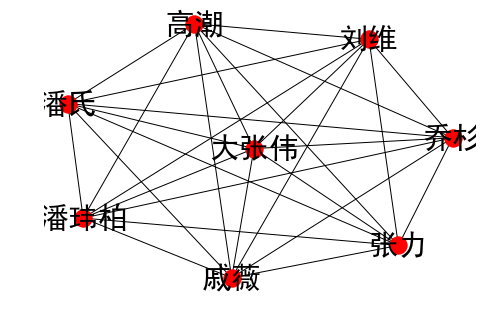

In [111]:
nx.draw(simple_graph_vis, with_labels=True, font_size=30)

In [113]:
names_from_1k = get_name_correlate(sentences[1000])

In [132]:
graph_with_weight_vis = nx.Graph()

for k, d in names_from_1k.items():
    for name, value in d.items():
        #print(k, name, value)
        graph_with_weight_vis.add_weighted_edges_from([(k, name, value)])

In [141]:
pos = nx.spectral_layout(graph_with_weight_vis)

edges = []

for k, d in names_from_1k.items():
    for name, value in d.items():
        edges.append((k, name, value))

In [143]:
edges[:10]

[('潘玮柏', '大张伟', 4),
 ('潘玮柏', '戚薇', 4),
 ('潘玮柏', '乔杉', 4),
 ('潘玮柏', '刘维', 4),
 ('潘玮柏', '张力', 4),
 ('潘玮柏', '潘氏', 4),
 ('潘玮柏', '高潮', 4),
 ('大张伟', '潘玮柏', 4),
 ('大张伟', '戚薇', 1),
 ('大张伟', '乔杉', 1)]

In [144]:
all_weight = set(w for n1, n2, w in edges)

In [145]:
all_weight

{1, 4}

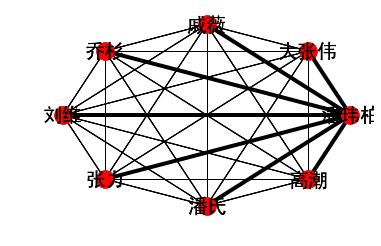

In [156]:
pos=nx.circular_layout(graph_with_weight_vis) 


for weight in all_weight:
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in graph_with_weight_vis.edges(data=True) if edge_attr['weight']==weight]
    width = weight
    nx.draw_networkx_edges(graph_with_weight_vis,pos,edgelist=weighted_edges,width=width)
    nx.draw(graph_with_weight_vis, pos=pos, with_labels=True, font_size=20)

In [158]:
def draw_people_connection_from_string(string):
    names_from_content = get_name_correlate(string)
    
    graph_with_weight_vis = nx.Graph()

    for k, d in names_from_content.items():
        for name, value in d.items():
        #print(k, name, value)
            graph_with_weight_vis.add_weighted_edges_from([(k, name, value)])
        
    pos=nx.circular_layout(graph_with_weight_vis) 

    for weight in all_weight:
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in graph_with_weight_vis.edges(data=True) if edge_attr['weight']==weight]
        width = weight
        nx.draw_networkx_edges(graph_with_weight_vis,pos,edgelist=weighted_edges,width=width)
        nx.draw(graph_with_weight_vis, pos=pos, with_labels=True, font_size=20)
        
    return graph_with_weight_vis

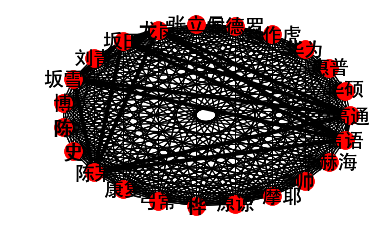

In [168]:
draw_people_connection_from_string(' '.join(sentences[:5]))

## 课后作业1： 应用搜索引擎，调整nextwork draw的方法和参数，使得产出能够良好可视化的图像

## K-means

## Remember we get the tfidf-vector from lessson-1

##### kmeans-visualize: https://www.youtube.com/watch?v=5I3Ei69I40s

![](imgs/k-means_result.gif)

![](imgs/k_means_2.png)

In [170]:
len(CHARACTERS)

33425826

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [174]:
import random

In [176]:
len(sentences)

89612

In [234]:
sample_sentences = random.sample(all_sentences_with_cut_tokens, k=1000)

In [235]:
sample_sentene_to_scikit = [
    ' '.join(s) for s in sample_sentences
]

In [188]:
TfidfVectorizer?

In [236]:
vectorizer = TfidfVectorizer()

In [237]:
X = vectorizer.fit_transform(sample_sentene_to_scikit)

In [238]:
X.shape

(1000, 25043)

In [239]:
vectorizer = TfidfVectorizer(max_features=3000)

In [240]:
X = vectorizer.fit_transform(sample_sentene_to_scikit)

In [241]:
vectorizer.vocabulary_

{'新华社': 1674,
 '照片': 2069,
 '济南': 1984,
 '2017': 24,
 '10': 2,
 'n4': 66,
 '月份': 1765,
 '工业': 1229,
 '指数': 1553,
 '下降': 175,
 '山东': 1220,
 '科技': 2256,
 '新型': 1676,
 '建筑': 1317,
 '工人': 1230,
 '进行': 2765,
 '作业': 449,
 '日摄': 1702,
 'n5': 67,
 '发布': 800,
 '数据': 1649,
 '显示': 1733,
 '同比': 864,
 '上涨': 159,
 '涨幅': 2011,
 '回落': 921,
 '12': 6,
 '百分点': 2170,
 '去年': 775,
 '以来': 396,
 '首次': 2961,
 '记者': 2598,
 '香港': 2964,
 '26': 31,
 '日电': 1707,
 '全新': 536,
 '推广': 1581,
 '项目': 2927,
 '中环': 258,
 '举行': 291,
 '启动': 874,
 '仪式': 398,
 '重新': 2829,
 '整合': 1653,
 '多元': 1025,
 '旅游': 1694,
 '特色': 2085,
 '推出': 1579,
 '主题': 287,
 '分别': 645,
 '代表': 388,
 '历史': 764,
 '艺术': 2474,
 '文化': 1657,
 '美食': 2403,
 '不同': 184,
 '元素': 511,
 '贯穿': 2660,
 '其中': 585,
 '多个': 1022,
 '餐厅': 2949,
 '旅客': 1693,
 '深度': 2017,
 '体验': 447,
 '主席': 281,
 '致辞': 2459,
 '表示': 2543,
 '一个': 84,
 '地区': 962,
 '独特': 2091,
 '生活': 2132,
 '更是': 1752,
 '发展': 799,
 '重要': 2831,
 '还是': 2740,
 '世界': 207,
 '重点': 2830,
 '陆续': 2877,
 '注入': 1970,
 '吸引': 876

In [242]:
X.shape

(1000, 3000)

In [243]:
X[2].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [244]:
X[1].toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.05211325,
        0.        ]])

In [245]:
import numpy as np

In [246]:
np.where(X[0].toarray())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([   2,    6,   24,   66,   67,  159,  175,  396,  449,  775,  800,
         864,  921, 1220, 1229, 1230, 1317, 1553, 1649, 1674, 1676, 1702,
        1733, 1765, 1984, 2011, 2069, 2170, 2256, 2598, 2765, 2961]))

In [247]:
id_to_word = {_id: word for word, _id in vectorizer.vocabulary_.items()}

In [248]:
''.join(sample_sentences[0])

'新华社照片济南2017年5月10日n4月份工业生产者出厂价格指数环比下降n在山东临沂天元科技新型建筑工业化产业基地工人进行钢板焊割作业5月3日摄n5月10日国家统计局发布数据显示4月份工业生产者出厂价格指数PPI同比上涨64涨幅比上月回落12个百分点从环比看4月份PPI由升转降是去年7月份以来的首次下降n新华社记者郭绪雷摄'

In [249]:
id_to_word[128]

'一艘'

In [250]:
id_to_word[176]

'不久前'

In [251]:
from sklearn.cluster import KMeans

In [252]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [253]:
kmeans.labels_

array([3, 3, 4, 4, 2, 2, 3, 1, 4, 3, 3, 1, 3, 0, 3, 3, 0, 1, 3, 2, 1, 3,
       3, 1, 3, 3, 3, 4, 3, 4, 3, 0, 3, 3, 1, 3, 3, 1, 3, 3, 4, 3, 2, 2,
       2, 2, 0, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       4, 3, 2, 3, 2, 4, 3, 3, 2, 3, 2, 4, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 2, 1, 3, 2, 3, 3, 0, 1, 2, 3, 2,
       1, 3, 3, 3, 3, 2, 4, 3, 2, 3, 1, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 1, 3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3,
       0, 1, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 2, 2, 3, 3, 3, 2, 0, 3, 2, 3,
       3, 4, 3, 2, 3, 3, 4, 3, 0, 3, 4, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 4,
       3, 4, 3, 3, 2, 4, 2, 3, 3, 2, 0, 2, 0, 3, 4, 0, 3, 3, 3, 2, 4, 2,
       3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 3, 4, 3, 3, 2,
       3, 3, 3, 3, 2, 1, 3, 3, 1, 3, 2, 3, 4, 1, 3, 3, 3, 3, 3, 2, 3, 0,
       3, 4, 3, 3, 3, 2, 3, 4, 3, 4, 1, 0, 3, 3, 3,

In [254]:
from sklearn.manifold import TSNE

In [255]:
X_embedded = TSNE(n_components=2).fit_transform(X.toarray())

In [256]:
X_embedded.shape

(1000, 2)

In [257]:
X_embedded[0]

array([47.150948,  9.411605], dtype=float32)

In [258]:
X_embedded[1]

array([11.063863, 20.33793 ], dtype=float32)

In [259]:
test_array = np.array([
    [1, 2], 
    [3, 4],
    [5, 6]
])

In [260]:
test_array[:, 0]

array([1, 3, 5])

In [261]:
test_array[:, 1]

array([2, 4, 6])

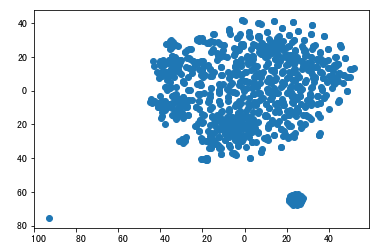

In [262]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

In [264]:
kmeans.labels_

array([3, 3, 4, 4, 2, 2, 3, 1, 4, 3, 3, 1, 3, 0, 3, 3, 0, 1, 3, 2, 1, 3,
       3, 1, 3, 3, 3, 4, 3, 4, 3, 0, 3, 3, 1, 3, 3, 1, 3, 3, 4, 3, 2, 2,
       2, 2, 0, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       4, 3, 2, 3, 2, 4, 3, 3, 2, 3, 2, 4, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 2, 1, 3, 2, 3, 3, 0, 1, 2, 3, 2,
       1, 3, 3, 3, 3, 2, 4, 3, 2, 3, 1, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 1, 3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3,
       0, 1, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 2, 2, 3, 3, 3, 2, 0, 3, 2, 3,
       3, 4, 3, 2, 3, 3, 4, 3, 0, 3, 4, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 4,
       3, 4, 3, 3, 2, 4, 2, 3, 3, 2, 0, 2, 0, 3, 4, 0, 3, 3, 3, 2, 4, 2,
       3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 3, 4, 3, 3, 2,
       3, 3, 3, 3, 2, 1, 3, 3, 1, 3, 2, 3, 4, 1, 3, 3, 3, 3, 3, 2, 3, 0,
       3, 4, 3, 3, 3, 2, 3, 4, 3, 4, 1, 0, 3, 3, 3,

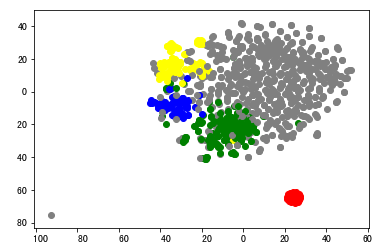

In [266]:
color = ['red', 'blue', 'green', 'gray', 'yellow']

for i, label in enumerate(kmeans.labels_):
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1], color=color[label])

In [281]:
red_articles_id = [i for i, label in enumerate(kmeans.labels_) if label == 0]
blue_articles_id = [i for i, label in enumerate(kmeans.labels_) if label == 1]

In [278]:
red_articles_id

[13,
 16,
 31,
 46,
 105,
 147,
 154,
 194,
 206,
 230,
 232,
 235,
 244,
 285,
 297,
 313,
 359,
 371,
 489,
 552,
 573,
 580,
 583,
 626,
 678,
 701,
 719,
 725,
 756,
 804,
 864,
 911,
 985]

In [282]:
for _id in red_articles_id[:10]:
    print(sample_sentences[_id])

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']


In [284]:
for _id in blue_articles_id:
    print(''.join(sample_sentences[_id]))

新华社照片青岛山东2017年4月11日n体育5游泳冠军赛李朱濠破50米蝶泳全国纪录并夺冠n4月11日金牌浙江选手李朱濠右二银牌上海选手施扬左一和铜牌广东选手周嘉威右一在男子50米蝶泳颁奖仪式上合影n当日在山东青岛进行的2017年全国游泳冠军赛暨第十三届全运会预选赛男子50米蝶泳决赛中浙江选手李朱濠以23秒36的成绩夺冠并创造新的全国纪录n新华社记者夏一方摄
新华社照片巴黎2017年6月3日n体育5网球法网郑赛赛贝古女双组合晋级n6月3日郑赛赛右贝古在比赛中n当日在法国巴黎进行的2017法国网球公开赛女子双打第二轮比赛中中国选手郑赛赛与罗马尼亚选手贝古的双打组合以2比1战胜美国选手斯皮尔斯与斯洛文尼亚选手斯莱伯尼克的双打组合进入下一轮n新华社记者韩岩摄nnnn
新华社照片青岛山东2017年4月14日n体育5游泳全国冠军赛孙杨获男子100米自由泳冠军n4月14日冠军浙江选手孙杨右二和亚军广东选手余贺新左一季军辽宁选手林永庆右一在颁奖仪式上n当日在山东青岛举行的2017年全国游泳冠军赛暨第十三届全运会预选赛中浙江选手孙杨以49秒27的成绩获得男子100米自由泳冠军n新华社记者朱峥摄
新华社照片杜塞尔多夫2017年6月6日n体育4乒乓球世乒赛丁宁刘诗雯获女双冠军n6月5日陈梦左朱雨玲在比赛中n当日在德国杜塞尔多夫举行的2017年世界乒乓球锦标赛女双决赛中中国选手丁宁刘诗雯以4比3战胜队友陈梦朱雨玲获得冠军n新华社记者单宇琦摄
新华社照片谢菲尔德英国2017年4月17日n体育3斯诺克世锦赛颜丙涛对阵墨菲n4月17日颜丙涛在比赛中n当日在英国谢菲尔德进行的世界斯诺克锦标赛首轮比赛中中国选手颜丙涛对阵英格兰选手肖恩墨菲n新华社发乔恩巴克尔摄
新华社照片外代2017年5月18日n外代二线网球意大利公开赛科贝尔出局n5月17日德国选手科贝尔在比赛中回球n当日在罗马举行的意大利网球公开赛女单次轮比赛中德国选手科贝尔以0比2不敌爱沙尼亚选手孔塔维特爆冷出局n新华社欧新n
新华社照片杜塞尔多夫2017年6月3日n体育8乒乓球世乒赛吉村真晴石川佳纯混双夺冠n6月3日吉村真晴中石川佳纯右在获胜后庆祝n当日在德国杜塞尔多夫举行的2017年世界乒乓球锦标赛混双决赛中日本组合吉村真晴石川佳纯以4比3战胜中国台北组合陈建安郑怡静夺得冠军n新华社记者陶希夷摄n
新华社照片杜塞尔多夫2017年6月3日n体